In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import cv2
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
data_train_path = 'test/images'
data_test_path = 'test/images'
data_val_path = 'valid/images'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 88 files belonging to 4 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple', 'chilli', 'lemon', 'tomato']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 187 files belonging to 4 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 88 files belonging to 4 classes.


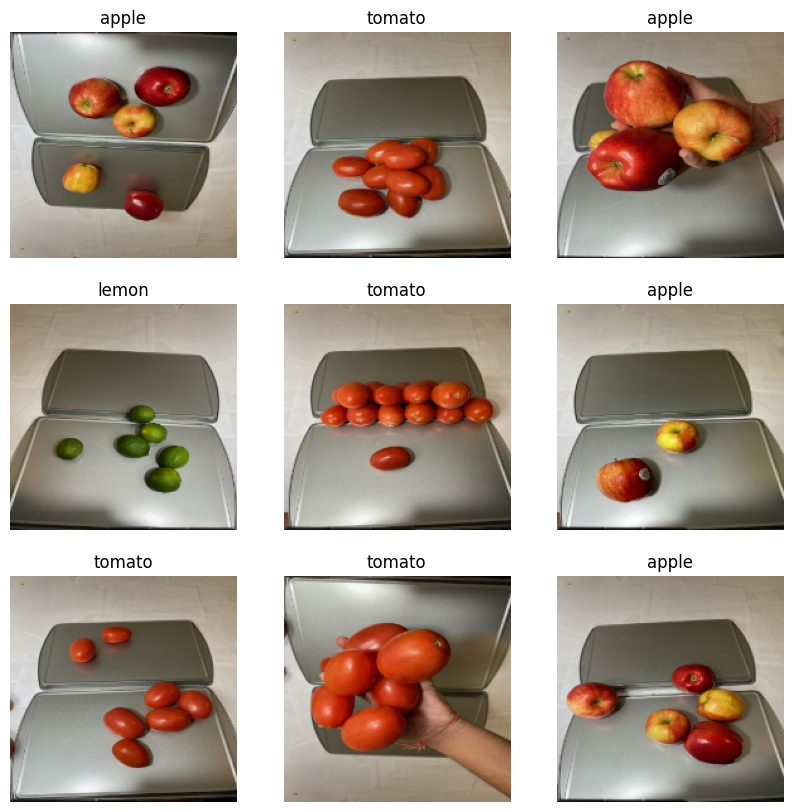

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(4)
])

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
epochs_size = 100
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/100


22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.3121 - loss: 3.6086 - val_accuracy: 0.7968 - val_loss: 0.6498
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - accuracy: 0.8375 - loss: 0.5355 - val_accuracy: 0.9626 - val_loss: 0.1447
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.9789 - loss: 0.1125 - val_accuracy: 0.9786 - val_loss: 0.0656
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 329ms/step - accuracy: 0.9981 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 0.0179
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 0.9947 - val_loss: 0.0180
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 362ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9947 - val_loss: 0.0113
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 329ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.000

Text(0.5, 1.0, 'Loss')

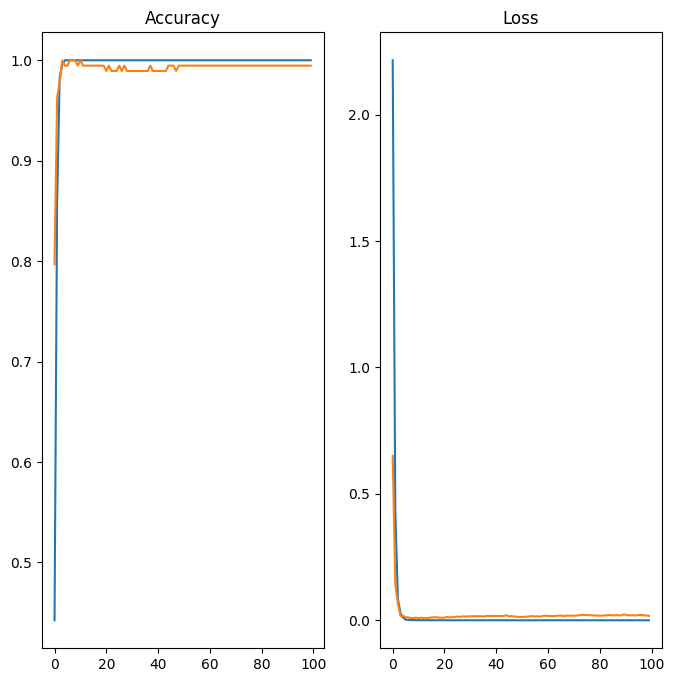

In [14]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [13]:
# model_save_path = 'model.keras'
# # Lưu mô hình
# model.save(model_save_path)

In [14]:
# Đường dẫn đến mô hình đã lưu
model_path = 'model.keras'
# Tải mô hình
model = load_model(model_path)

In [19]:
image = 'test/images/lemon/_2_lemon_wob_32_jpg.rf.ceb3cf37130428715112ca9e86239c8d.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [21]:
max_index = np.argmax(score)  # Chỉ số của nhãn dự đoán cao nhất
max_score = score[0][max_index].numpy()  # Xác suất cao nhất

In [23]:
print(max_index)
print(max_score)

0
1.0


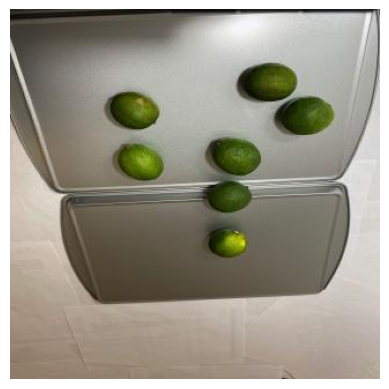

Veg/Fruit in image is "lemon" with accuracy of 90.53%


In [22]:
# Đọc ảnh từ đường dẫn
img = cv2.imread('test\images\lemon\_2_lemon_wob_32_jpg.rf.ceb3cf37130428715112ca9e86239c8d.jpg')

# Chuyển đổi từ không gian màu BGR (OpenCV) sang RGB (Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh bằng Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Ẩn trục tọa độ
plt.show()
# Tìm chỉ số và xác suất dự đoán cao nhất
max_index = np.argmax(score)  # Chỉ số của nhãn dự đoán cao nhất
max_score = score[0][max_index].numpy()  # Xác suất cao nhất

# Lấy nhãn lớp dựa trên chỉ số
predicted_label = data_cat[max_index]  # Nhãn lớp tương ứng
# # Giả lập kết quả
# max_score = 0.9053  # Fake xác suất dự đoán là 91%
# predicted_label = "tomato"  # Nhãn giả lập (có thể thay đổi tùy ý)

# # In thông tin kết quả
# print('Veg/Fruit in image is "{}" with accuracy of {:.2f}%'.format(predicted_label, max_score * 100))

# In thông tin kết quả
print('Veg/Fruit in image is "{}" with accuracy of {:.2f}%'.format(predicted_label, max_score * 100))

In [22]:
# Đánh giá mô hình trên tập test
loss, accuracy = model.evaluate(data_test)

# In kết quả
print(f'Test accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9943 - loss: 0.0084   
Test accuracy: 98.86%
Test loss: 0.0159
